In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%pwd

'G:\\My Drive\\a PhD Projects\\GBM Modeling\\python scripts'

In [4]:
cd "G:\My Drive"

G:\My Drive


In [5]:
%pwd

'G:\\My Drive'

In [6]:
cd "G:\My Drive\a PhD Projects\GBM Modeling\python scripts\data\k2_model\conventional_BED\\finalRun\28_Mar\death_val_of_kim\corrected_reprog\0.01\\1\\1000000000.0\\0.2\\0.1\\Schedule0\"

G:\My Drive\a PhD Projects\GBM Modeling\python scripts\data\k2_model\conventional_BED\finalRun\28_Mar\death_val_of_kim\corrected_reprog\0.01\1\1000000000.0\0.2\0.1\Schedule0


In [7]:
%pwd

'G:\\My Drive\\a PhD Projects\\GBM Modeling\\python scripts\\data\\k2_model\\conventional_BED\\finalRun\\28_Mar\\death_val_of_kim\\corrected_reprog\\0.01\\1\\1000000000.0\\0.2\\0.1\\Schedule0'

In [8]:
ls

 Volume in drive G is Google Drive
 Volume Serial Number is 1983-1116

 Directory of G:\My Drive\a PhD Projects\GBM Modeling\python scripts\data\k2_model\conventional_BED\finalRun\28_Mar\death_val_of_kim\corrected_reprog\0.01\1\1000000000.0\0.2\0.1\Schedule0

04/15/2022  10:51 AM    <DIR>          .
03/28/2022  09:56 PM    <DIR>          ..
04/15/2022  10:51 AM        50,049,127 TU_0.005196_reprog10.0_Gy_3.0_Fracs_1000days__w_death_fdbk_w_no_reprog_6.txt
04/15/2022  10:51 AM        50,049,127 TU_0.005196_reprog10.0_Gy_3.0_Fracs_1000days__w_death_fdbk_w_reprog_6.txt
04/15/2022  10:51 AM        50,041,027 TU_0.005196_reprog2.0_Gy_30.0_Fracs_1000days__w_death_fdbk_w_no_reprog_6.txt
04/15/2022  10:50 AM        50,199,669 TU_0.005196_reprog2.0_Gy_30.0_Fracs_1000days__w_death_fdbk_w_reprog_6.txt
04/13/2022  04:08 AM       750,041,027 TU_0.005196_reprog2.0_Gy_30.0_Fracs_15000days__w_death_fdbk_w_no_reprog_6.txt
04/13/2022  04:10 AM       750,041,027 TU_0.005196_reprog2.0_Gy_30.0_Fracs_15000da

In [9]:
%ls

 Volume in drive G is Google Drive
 Volume Serial Number is 1983-1116

 Directory of G:\My Drive\a PhD Projects\GBM Modeling\python scripts\data\k2_model\conventional_BED\finalRun\28_Mar\death_val_of_kim\corrected_reprog\0.01\1\1000000000.0\0.2\0.1\Schedule0

04/15/2022  10:51 AM    <DIR>          .
03/28/2022  09:56 PM    <DIR>          ..
04/15/2022  10:51 AM        50,049,127 TU_0.005196_reprog10.0_Gy_3.0_Fracs_1000days__w_death_fdbk_w_no_reprog_6.txt
04/15/2022  10:51 AM        50,049,127 TU_0.005196_reprog10.0_Gy_3.0_Fracs_1000days__w_death_fdbk_w_reprog_6.txt
04/15/2022  10:51 AM        50,041,027 TU_0.005196_reprog2.0_Gy_30.0_Fracs_1000days__w_death_fdbk_w_no_reprog_6.txt
04/15/2022  10:50 AM        50,199,669 TU_0.005196_reprog2.0_Gy_30.0_Fracs_1000days__w_death_fdbk_w_reprog_6.txt
04/13/2022  04:08 AM       750,041,027 TU_0.005196_reprog2.0_Gy_30.0_Fracs_15000days__w_death_fdbk_w_no_reprog_6.txt
04/13/2022  04:10 AM       750,041,027 TU_0.005196_reprog2.0_Gy_30.0_Fracs_15000da

In [10]:
dyn2 = np.loadtxt("TU_0.005196_reprog2.0_Gy_30.0_Fracs_1000days__w_death_fdbk_w_reprog_6.txt");


In [11]:
def calc_BED_Frac(a,b,Dose,baseline_BED=60*(1+2/8.5)):
    # a = .17, b =.02
    # the baseline BED is set to conventional dosage, by default
    if Dose > 0:
        return np.floor(baseline_BED/(Dose*(1+Dose/(a/b))))
    else:
        return 0;

Doses = [2.0,4.0,6.0,8.0,10.0];
Fracs = list(map(lambda d: float(np.floor(calc_BED_Frac(.17,.02,d))),Doses));

In [12]:
L = len(Doses);
dyn = np.arange(L).tolist();
for i in range(L):
    dyn[i] = np.loadtxt("TU_0.005196_reprog"+str(Doses[i])+"_Gy_"+str(Fracs[i])+"_Fracs_1000days__w_death_fdbk_w_reprog_6.txt");
    

In [13]:
def calc_EOT(frac_num, treat_start):
    # EOT = End of Treatment
    frac_num = int(frac_num);
    weeks = frac_num//5;
    total_days = frac_num + 2*weeks;
    treat_days = np.tile([1,1,1,1,1,0,0], weeks+1)[:total_days].nonzero()[0]+treat_start;
    sim_resume_days = treat_days+10/(60*24); # ODE simulation resumes 10 minutes after RT
    return sim_resume_days[-1];

EOTs  = list(map(lambda f: calc_EOT(f,100),Fracs));

In [14]:
EOTs

[139.00694444444446,
 115.00694444444444,
 108.00694444444444,
 103.00694444444444,
 102.00694444444444]

In [15]:
EOT_idxs = np.zeros(L,dtype=int);
for i in range(L):
    EOT_idxs[i] = int(np.where(dyn[i][0] == EOTs[i])[0][0])

In [16]:
EOT_idxs

array([19913,  7967,  4482,  1991,  1494])

In [17]:
np.where(dyn[1][0] == 100+10/(60*24))

(array([500], dtype=int64),)

In [18]:
dyn[0][1:,EOT_idxs[0]]

array([6.49417149e-05, 4.75781269e-06, 4.19332053e-01])

In [19]:
a1 = 0.01
b1 = 1.77e-7
a2 = 0.125
b2 = 0.028

In [20]:
c = 5.196*10 ** -3
total_cell_num = 4/3*np.pi*10**9

In [21]:
def radiotherapy(U,D, reprogQ):
    u, v, mu = U;
    SF_U =  np.exp(-a1*D-b1*D**2);
    SF_V = np.exp(-a2*D-b2*D**2);
    mu_new = (mu +c * D+ .01428 )*reprogQ;  # 2 Nov: added "+ .01428" 
    v_new = max(0,(1 - min(1,mu_new))*SF_V*v);
    u_new = u*SF_U + min(1,mu_new)*SF_V*v;
    return np.array([u_new,v_new, mu_new, SF_U, SF_V])


In [44]:
outpT=np.array(radiotherapy(dyn[0][1:,EOT_idxs[0]],Doses[0],True));
outpF=np.array(radiotherapy(dyn[0][1:,EOT_idxs[0]],Doses[0],False));
print(np.multiply(outpT[0:3],[total_cell_num,total_cell_num,1]))
print(np.multiply(outpF[0:3],[total_cell_num,total_cell_num,1]))
print(outpT[3:])
print(outpF[3:])

[2.72801773e+05 7.71530275e+03 4.44004053e-01]
[266640.53059499  13876.54495219      0.        ]
[0.98019798 0.69628237]
[0.98019798 0.69628237]


In [35]:
outpU =np.zeros((3,L,2));
outpSF=np.zeros((2,L,2));
for i in range(L):
    tempT = radiotherapy(dyn[i][1:,EOT_idxs[0]-1],Doses[i],True)
    outpU[:,i,0] = tempT[:3]; outpSF[:,i,0] = tempT[3:];
    tempF = radiotherapy(dyn[i][1:,EOT_idxs[0]-1],Doses[i],False)
    outpU[:,i,1] = tempF[:3]; outpSF[:,i,1] = tempF[3:];

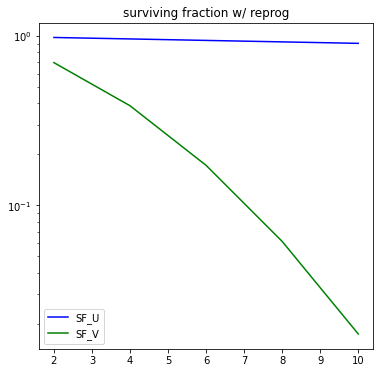

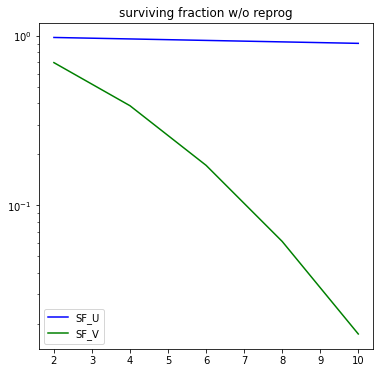

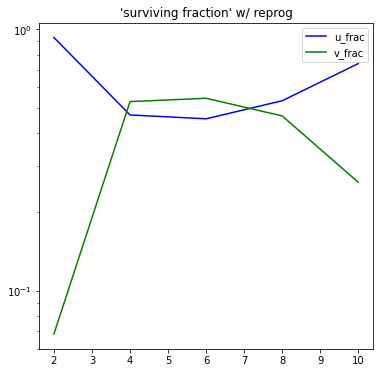

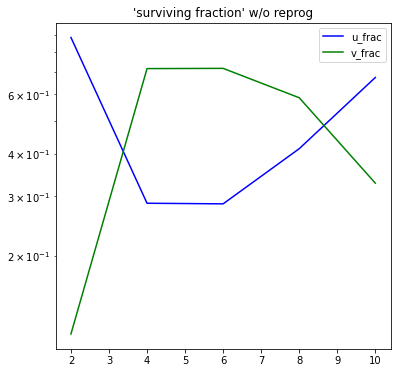

In [36]:
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(Doses,outpSF[0,:,0],'b-',label="SF_U")
ax.plot(Doses,outpSF[1,:,0],'g-',label="SF_V")
ax.set_title("surviving fraction w/ reprog")
ax.set_yscale('log')
ax.legend()

fig,ax=plt.subplots(figsize=(6,6))
ax.plot(Doses,outpSF[0,:,1],'b-',label="SF_U")
ax.plot(Doses,outpSF[1,:,1],'g-',label="SF_V")
ax.set_title("surviving fraction w/o reprog")
ax.set_yscale('log')
ax.legend()

figU,axU=plt.subplots(figsize=(6,6))
axU.plot(Doses,outpU[0,:,0]/(outpU[0,:,0]+outpU[1,:,0]),'b-',label="u_frac")
axU.plot(Doses,outpU[1,:,0]/(outpU[0,:,0]+outpU[1,:,0]),'g-',label="v_frac")
axU.set_title("'surviving fraction' w/ reprog")
axU.set_yscale('log')
axU.legend()

figU,axU=plt.subplots(figsize=(6,6))
axU.plot(Doses,outpU[0,:,1]/(outpU[0,:,1]+outpU[1,:,1]),'b-',label="u_frac")
axU.plot(Doses,outpU[1,:,1]/(outpU[0,:,1]+outpU[1,:,1]),'g-',label="v_frac")
axU.set_title("'surviving fraction' w/o reprog")
axU.set_yscale('log')
axU.legend()

In [42]:
#outpUa =np.zeros((3,L));
#outpSFa=np.zeros((2,L));
#for i in range(L):
#    temp = radiotherapy0(dyn[i][1:,500],Doses[i])
#    outpUa[:,i] = temp[:3]; outpSFa[:,i] = temp[3:]

outpUa =np.zeros((3,L,2));
outpSFa=np.zeros((2,L,2));
for i in range(L):
    tempT = radiotherapy(dyn[i][1:,500],Doses[i],True)
    outpUa[:,i,0] = tempT[:3]; outpSFa[:,i,0] = tempT[3:];
    tempF = radiotherapy(dyn[i][1:,500],Doses[i],False)
    outpUa[:,i,1] = tempF[:3]; outpSFa[:,i,1] = tempF[3:];

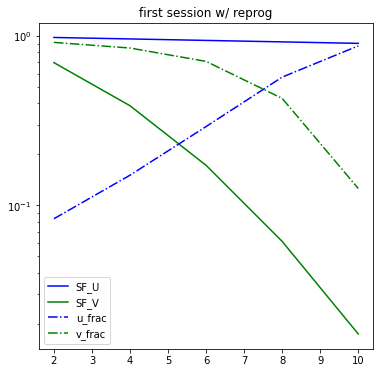

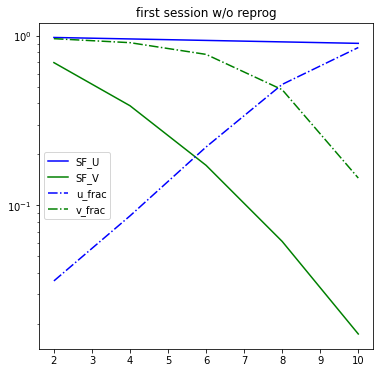

In [47]:
fig,ax=plt.subplots(figsize=(6,6))
ax.plot(Doses,outpSFa[0,:,0],'b-',label="SF_U")
ax.plot(Doses,outpSFa[1,:,0],'g-',label="SF_V")
ax.plot(Doses,outpUa[0,:,0]/(outpUa[0,:,0]+outpUa[1,:,0]),'b-.',label="u_frac")
ax.plot(Doses,outpUa[1,:,0]/(outpUa[0,:,0]+outpUa[1,:,0]),'g-.',label="v_frac")
ax.set_title("first session w/ reprog")
ax.set_yscale('log')
ax.legend()

figU,axU=plt.subplots(figsize=(6,6))
axU.plot(Doses,outpSFa[0,:,1],'b-',label="SF_U")
axU.plot(Doses,outpSFa[1,:,1],'g-',label="SF_V")
axU.plot(Doses,outpUa[0,:,1]/(outpUa[0,:,1]+outpUa[1,:,1]),'b-.',label="u_frac")
axU.plot(Doses,outpUa[1,:,1]/(outpUa[0,:,1]+outpUa[1,:,1]),'g-.',label="v_frac")
axU.set_title("first session w/o reprog")
axU.set_yscale('log')
axU.legend()

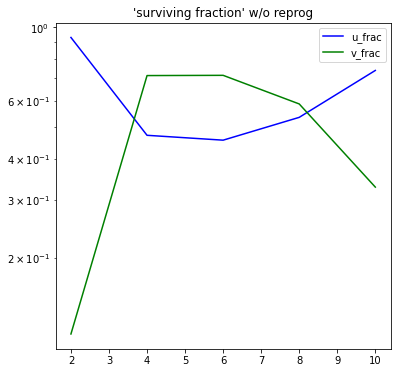

In [40]:
figU,axU=plt.subplots(figsize=(6,6))
axU.plot(Doses,outpU[0,:,0]/(outpU[0,:,0]+outpU[1,:,0]),'b-',label="u_frac")
axU.plot(Doses,outpU[1,:,1]/(outpU[0,:,1]+outpU[1,:,1]),'g-',label="v_frac")
axU.set_title("'surviving fraction' w/o reprog")
axU.set_yscale('log')
axU.legend()

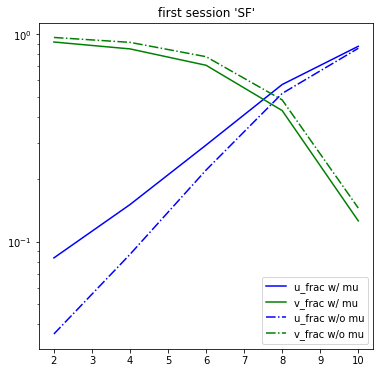

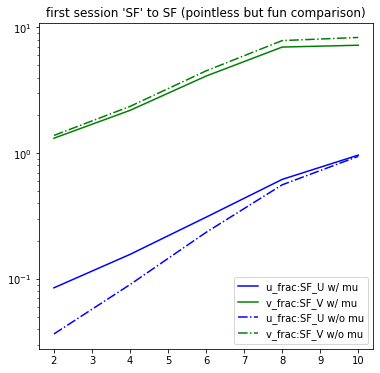

In [51]:
figS,axS=plt.subplots(figsize=(6,6))
axS.plot(Doses,outpUa[0,:,0]/(outpUa[0,:,0]+outpUa[1,:,0]),'b-',label="u_frac w/ mu")
axS.plot(Doses,outpUa[1,:,0]/(outpUa[0,:,0]+outpUa[1,:,0]),'g-',label="v_frac w/ mu")
axS.plot(Doses,outpUa[0,:,1]/(outpUa[0,:,1]+outpUa[1,:,1]),'b-.',label="u_frac w/o mu")
axS.plot(Doses,outpUa[1,:,1]/(outpUa[0,:,1]+outpUa[1,:,1]),'g-.',label="v_frac w/o mu")
axS.set_title("first session 'SF'")
axS.set_yscale('log')
axS.legend()

figS,axS=plt.subplots(figsize=(6,6))
axS.plot(Doses,(outpUa[0,:,0]/(outpUa[0,:,0]+outpUa[1,:,0]))/outpSFa[0,:,0],'b-',label="u_frac:SF_U w/ mu")
axS.plot(Doses,(outpUa[1,:,0]/(outpUa[0,:,0]+outpUa[1,:,0]))/outpSFa[1,:,0],'g-',label="v_frac:SF_V w/ mu")
axS.plot(Doses,(outpUa[0,:,1]/(outpUa[0,:,1]+outpUa[1,:,1]))/outpSFa[0,:,1],'b-.',label="u_frac:SF_U w/o mu")
axS.plot(Doses,(outpUa[1,:,1]/(outpUa[0,:,1]+outpUa[1,:,1]))/outpSFa[1,:,1],'g-.',label="v_frac:SF_V w/o mu")
axS.set_title("first session 'SF' to SF (pointless but fun comparison)")
axS.set_yscale('log')
axS.legend()